In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from codecarbon import EmissionsTracker

# Désactivation des messages TensorFlow inutiles (infos/warnings)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Initialisation du suivi énergétique
tracker = EmissionsTracker(project_name="MLP_Augmented")
tracker.start()

print("Environnement configuré.")

[codecarbon WARNING @ 19:05:44] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:05:44] [setup] RAM Tracking...
[codecarbon INFO @ 19:05:44] [setup] CPU Tracking...
[codecarbon WARNING @ 19:05:46] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 19:05:46] CPU Model on constant consumption mode: Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz
[codecarbon WARNING @ 19:05:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 19:05:46] [setup] GPU Tracking...
[codecarbon INFO @ 19:05:46] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:05:46] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 19:05:46] >>> Tracker's m

Environnement configuré.


In [2]:
# Chargement des données d'entraînement
train_ds = tf.keras.utils.image_dataset_from_directory(
    'banana_sushi/train',
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical',
    shuffle=True 
)

# Chargement des données de validation
val_ds = tf.keras.utils.image_dataset_from_directory(
    'banana_sushi/val',
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical',
    shuffle=False 
)

class_names = train_ds.class_names
print(f"Classes trouvées : {class_names}")

Found 287 files belonging to 4 classes.
Found 141 files belonging to 4 classes.
Classes trouvées : ['banana', 'pizza', 'sushi', 'tomato']


In [3]:
# Définition de la couche de Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Construction du Modèle MLP
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    
    # Mise à l'échelle des pixels (0-255 vers 0-1)
    layers.Rescaling(1./255),
    
    # Transformation de la matrice 2D en vecteur 1D
    layers.Flatten(),
    
    # Couches denses (le "Cerveau" du MLP)
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3), # Pour éviter que le modèle ne dépende trop de certains neurones
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    
    # Couche de sortie (4 classes)
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,298,692 (96.51 MB)

 Trainable params: 25,298,692 (96.51 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
print("Lancement de l'entraînement MLP avec Data Augmentation...")
history = model.fit(train_ds, validation_data=val_ds, epochs=15)
model.save('model_MLP.h5')

Lancement de l'entraînement MLP avec Data Augmentation...
Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.2892 - loss: 48.7628 - val_accuracy: 0.2695 - val_loss: 54.7830
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 404ms/step - accuracy: 0.2718 - loss: 25.5776 - val_accuracy: 0.2837 - val_loss: 6.2986
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.2822 - loss: 11.3029 - val_accuracy: 0.6454 - val_loss: 1.3570
Epoch 4/15
4/9 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.3379 - loss: 7.5063

[codecarbon INFO @ 19:06:05] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:06:05] Delta energy consumed for CPU with constant : 0.000753 kWh, power : 180.0 W


5/9 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.3353 - loss: 7.4371

[codecarbon INFO @ 19:06:05] Energy consumed for All CPU : 0.000753 kWh
[codecarbon INFO @ 19:06:05] Energy consumed for all GPUs : 0.000009 kWh. Total GPU Power : 2.1177055096710538 W
[codecarbon INFO @ 19:06:05] 0.000804 kWh of electricity and 0.000000 L of water were used since the beginning.


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.3589 - loss: 6.1960 - val_accuracy: 0.2979 - val_loss: 4.9542
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.4007 - loss: 3.8638 - val_accuracy: 0.2553 - val_loss: 1.9565
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step - accuracy: 0.4390 - loss: 2.2634 - val_accuracy: 0.4468 - val_loss: 1.3787
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.3902 - loss: 1.5244 - val_accuracy: 0.5887 - val_loss: 1.1740
Epoch 8/15
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.5031 - loss: 1.2268

[codecarbon INFO @ 19:06:20] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:06:20] Delta energy consumed for CPU with constant : 0.000749 kWh, power : 180.0 W
[codecarbon INFO @ 19:06:20] Energy consumed for All CPU : 0.001502 kWh
[codecarbon INFO @ 19:06:20] Energy consumed for all GPUs : 0.000018 kWh. Total GPU Power : 2.129109446188229 W
[codecarbon INFO @ 19:06:20] 0.001603 kWh of electricity and 0.000000 L of water were used since the beginning.


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.5017 - loss: 1.2463 - val_accuracy: 0.4255 - val_loss: 1.1408
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.4669 - loss: 1.1626 - val_accuracy: 0.5957 - val_loss: 1.0275
Epoch 10/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.5157 - loss: 1.0798 - val_accuracy: 0.6241 - val_loss: 1.0211
Epoch 11/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 381ms/step - accuracy: 0.4704 - loss: 1.1148 - val_accuracy: 0.6312 - val_loss: 0.9980
Epoch 12/15
6/9 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.5442 - loss: 1.0767

[codecarbon INFO @ 19:06:35] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:06:35] Delta energy consumed for CPU with constant : 0.000750 kWh, power : 180.0 W
[codecarbon INFO @ 19:06:35] Energy consumed for All CPU : 0.002252 kWh
[codecarbon INFO @ 19:06:35] Energy consumed for all GPUs : 0.000027 kWh. Total GPU Power : 2.1145647898688438 W
[codecarbon INFO @ 19:06:35] 0.002404 kWh of electricity and 0.000000 L of water were used since the beginning.


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.5296 - loss: 1.1046 - val_accuracy: 0.6383 - val_loss: 0.8511
Epoch 13/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.5366 - loss: 1.0178 - val_accuracy: 0.6383 - val_loss: 0.8505
Epoch 14/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.5157 - loss: 1.0781 - val_accuracy: 0.5532 - val_loss: 0.9641
Epoch 15/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.5017 - loss: 1.0168 - val_accuracy: 0.5957 - val_loss: 1.1304


[codecarbon INFO @ 19:06:50] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:06:50] Delta energy consumed for CPU with constant : 0.000750 kWh, power : 180.0 W
[codecarbon INFO @ 19:06:50] Energy consumed for All CPU : 0.003002 kWh
[codecarbon INFO @ 19:06:50] Energy consumed for all GPUs : 0.000035 kWh. Total GPU Power : 2.133803619923826 W
[codecarbon INFO @ 19:06:50] 0.003204 kWh of electricity and 0.000000 L of water were used since the beginning.


In [5]:
print("\n--- RÉSULTATS MLP AUGMENTÉ ---")
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

# Affichage du rapport de classification
print(classification_report(y_true, y_pred, target_names=class_names))

# Arrêt et affichage du bilan carbone
emissions = tracker.stop()
print(f"\n[BILAN ÉNERGÉTIQUE] Consommation : {emissions:.6f} kg CO2")


--- RÉSULTATS MLP AUGMENTÉ ---


[codecarbon INFO @ 19:06:53] Energy consumed for RAM : 0.000176 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:06:53] Delta energy consumed for CPU with constant : 0.000165 kWh, power : 180.0 W
[codecarbon INFO @ 19:06:53] Energy consumed for All CPU : 0.003167 kWh
[codecarbon INFO @ 19:06:53] Energy consumed for all GPUs : 0.000037 kWh. Total GPU Power : 2.1181980802496447 W
[codecarbon INFO @ 19:06:53] 0.003380 kWh of electricity and 0.000000 L of water were used since the beginning.


              precision    recall  f1-score   support

      banana       0.88      0.66      0.75        65
       pizza       0.40      0.80      0.53        25
       sushi       0.60      0.29      0.39        31
      tomato       0.44      0.60      0.51        20

    accuracy                           0.60       141
   macro avg       0.58      0.59      0.55       141
weighted avg       0.67      0.60      0.60       141


[BILAN ÉNERGÉTIQUE] Consommation : 0.000189 kg CO2


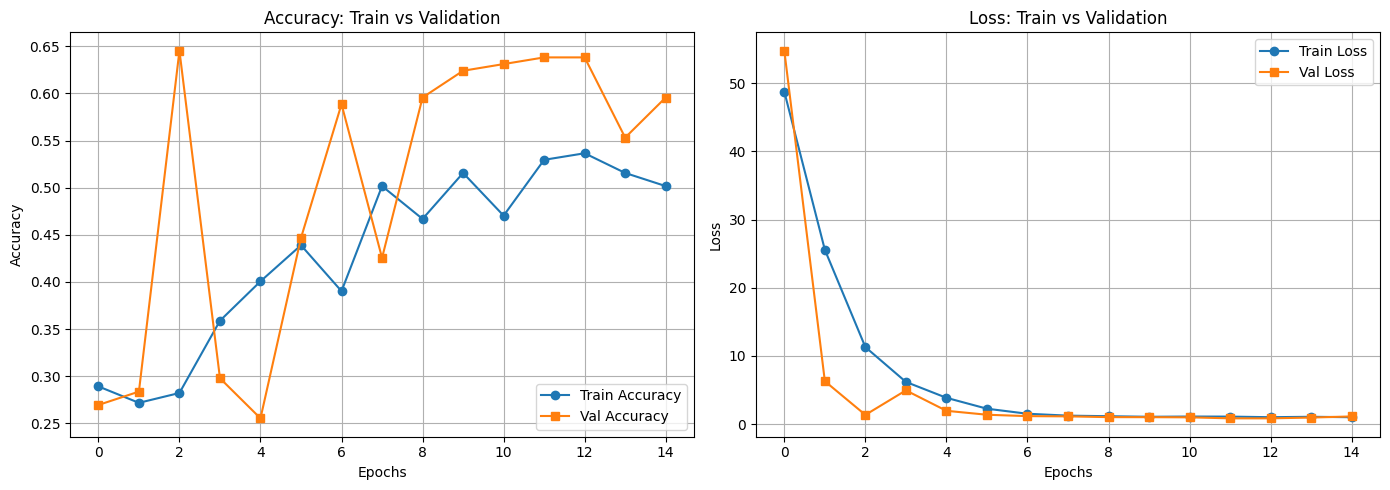

Graphique sauvegardé: mlp_training_curves.png


In [7]:
import matplotlib.pyplot as plt

# Extraction des métriques
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Création des graphiques
plt.figure(figsize=(14, 5))

# Courbe d'Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy: Train vs Validation')
plt.legend()
plt.grid(True)

# Courbe de Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss: Train vs Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('mlp_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graphique sauvegardé: mlp_training_curves.png")